<h3>Sample Poc on Neural Networks.</h3>


<h4>MLPClassifier</h4>

Downloading all the MNIST images onto the local drive

In [190]:
import os
from urllib.request import urlretrieve
import numpy as np

def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# We then define functions for loading MNIST images and labels.
# For convenience, they also download the requested files if needed.
import gzip

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    # The inputs are vectors now, we reshape them to monochrome 2D images,
    # following the shape convention: (examples, channels, rows, columns)
    data = data.reshape(-1, 1, 28, 28)
    # The inputs come as bytes, we convert them to float32 in range [0,1].
    # (Actually to range [0, 255/256], for compatibility to the version
    # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
    return data / np.float32(256)

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the labels in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    # The labels are vectors of integers now, that's exactly what we want.
    return data


X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')



In [191]:
print('X_train.... ',X_train.shape)
print('X_test.... ',X_test.shape)
print('y_train.... ',y_train.shape)
print('y_test.... ',y_test.shape)



X_train....  (60000, 1, 28, 28)
X_test....  (10000, 1, 28, 28)
y_train....  (60000,)
y_test....  (10000,)


In [192]:
X = X_train
y = y_train


<h4>Exploratory analysis on the dataset </h4>

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 1
plt.rcParams['ytick.labelsize'] = 1

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

    
    

Saving figure test_digit_plot


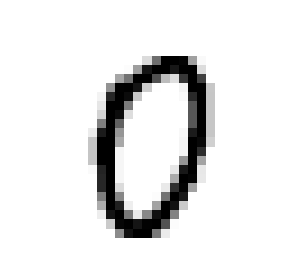

In [194]:
test_digit = X_train[1000]
test_digit_image = test_digit.reshape(28,28)
plt.imshow(test_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("test_digit_plot")
plt.show()

In [195]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

Show images

In [196]:
def plot_digits(instances, images_per_row=20, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    print('length:',len(images),images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    

length: 100 10
Saving figure more_digits_plot


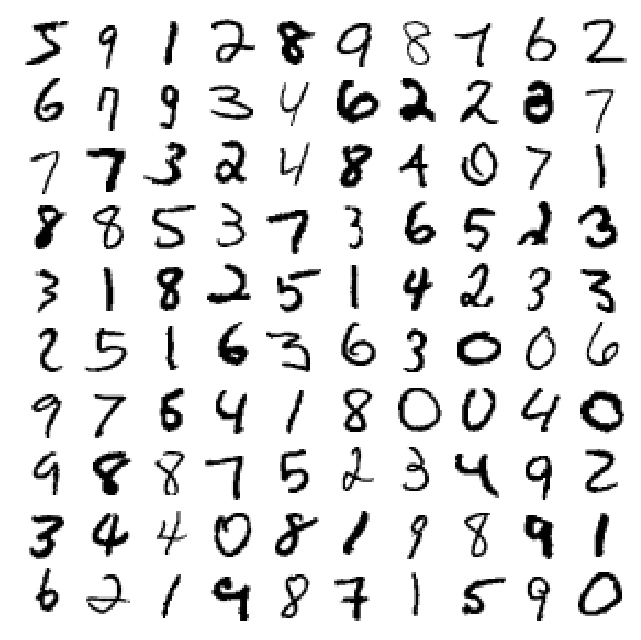

In [197]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [199]:
y[1000]

0

In [200]:
#Convert to the standard format of input. For training data

size = 784
X_train = [data.reshape(size) for data in X_train]

type(X_train)
print(len(X_train))
X_train = np.asarray(X_train)
type(X_train)
X_train.shape

60000


(60000, 784)

In [201]:
size = 784
X_test = [data.reshape(size) for data in X_test]
X_test = np.asarray(X_test)
X_test.shape

(10000, 784)

In [202]:
y_train,y_test =y, y_test
y_train.shape

(60000,)

In [203]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

<h4>Binany Classifier POC </h4>

In [240]:
y_train_5 = (y_train == 0)
y_test_5 = (y_test == 0)
print(y_train_5.shape)

(60000,)


In [205]:
from sklearn.linear_model import SGDClassifier

In [210]:
sgd_clf = SGDClassifier(n_iter=10,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

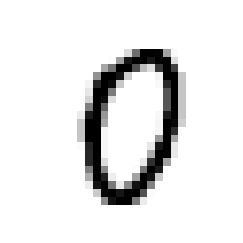

array([ True], dtype=bool)

In [211]:

plot_digit(test_digit)
sgd_clf.predict([test_digit.reshape(28*28)])

In [213]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9900005 ,  0.98905   ,  0.98779939])

Testing for the entire training example

In [214]:
sgd_clf = SGDClassifier(n_iter=10,random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [215]:
sgd_clf.predict([test_digit.reshape(28*28)])

array([0], dtype=uint8)

In [217]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([ 0.89562088,  0.8840442 ,  0.88878332])

In [230]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.990000499975
0.98905
0.987799389969


In [233]:
y_pred = sgd_clf.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [234]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [237]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53821,   256],
       [  407,  5516]])

In [254]:
y_train_5_true = y_train_5;
confusion_matrix(y_train_5,y_train_5_true)

array([[54077,     0],
       [    0,  5923]])

In [248]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.95564795564795568

In [250]:
5516/(5516+256)

0.9556479556479557

In [249]:
recall_score(y_train_5,y_train_pred)

0.93128482188080364

In [251]:
5516/(5516+407)

0.9312848218808036

In [252]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.94330910645575028

In [279]:
y_scores = sgd_clf.decision_function([X_train[1000]])
y_scores

array([[-16.39017555,  -5.65347855,  -5.08544714,   3.62780304,
         -9.31851584,  -3.07900652,  -6.44430932,  -8.47894166,
         -5.79094801,  -7.68550441]])

In [280]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False,  True, False, False, False, False, False,
        False]], dtype=bool)

In [281]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [282]:
y_scores.shape

(60000,)

In [283]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


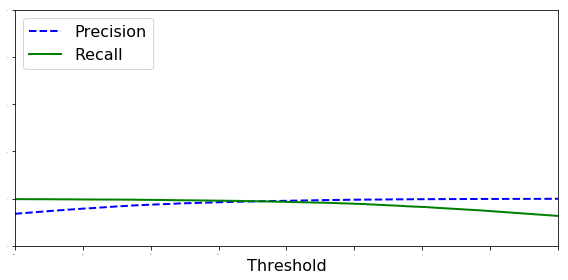

In [285]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 5])
    plt.xlim([-10, 10])
    save_fig("precision_recall_vs_threshold_plot")
    plt.show()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


<h3> ROC Curves </h3>

In [290]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [288]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    

Saving figure roc_curve_plot


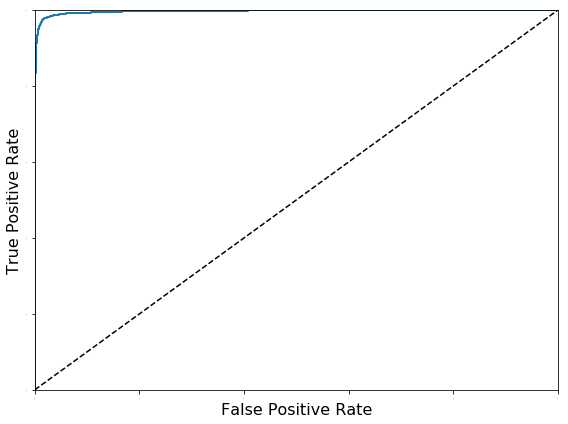

In [289]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [292]:
roc_auc_score(y_train_5,y_scores)

0.99664996109202286

<h3> Using Ensemblers </h3>

In [293]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [303]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_probas_forest.shape

(60000, 2)

Saving figure roc_curve_comparison_plot


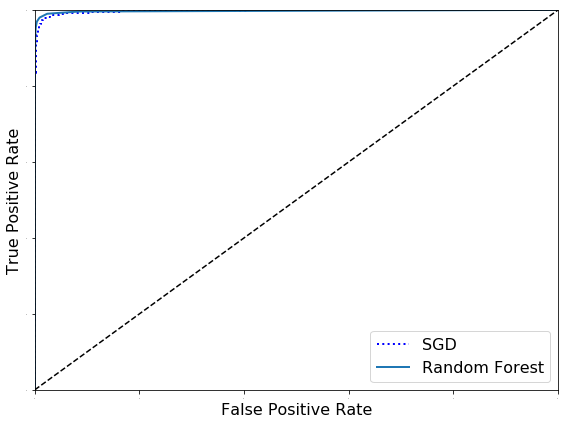

In [301]:
y_scores_forecast = y_probas_forest[:,1]
y_scores_forecast
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forecast)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [305]:
roc_auc_score(y_train_5, y_scores_forecast)

0.99701451370901339

In [310]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.99173405211141064

In [311]:
recall_score(y_train_5, y_train_pred_forest)

0.9317913219652203

In [312]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_pred_forest)

Saving figure precision_recall_vs_threshold_plot


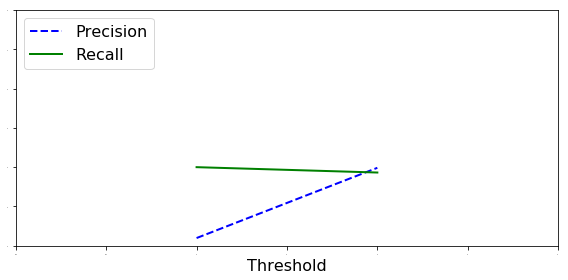

In [317]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 3])
    plt.xlim([-1, 2])
    save_fig("precision_recall_vs_threshold_plot")
    plt.show()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

<b> MultiClass Implemenation </b>

In [319]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [371]:
some_digit = X_train[2000].reshape(28*28)


In [322]:
forest_clf.predict([some_digit])

array([7], dtype=uint8)

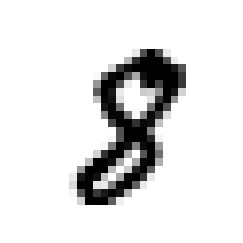

In [372]:
plot_digit(some_digit)

In [324]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [327]:
y_train_pred = cross_val_predict(forest_clf,X_train,y_train,cv=3)

In [329]:
confusion_mx = confusion_matrix(y_train,y_train_pred)
confusion_mx

array([[5814,    1,   17,   11,   12,    8,   30,    2,   27,    1],
       [   1, 6615,   34,   25,   11,   10,    6,   16,   18,    6],
       [  51,   25, 5644,   49,   40,    8,   33,   48,   50,   10],
       [  23,   15,  149, 5612,    8,  116,   13,   59,  102,   34],
       [  11,   23,   33,    5, 5533,   11,   38,   19,   23,  146],
       [  53,   12,   22,  188,   24, 4965,   65,    8,   53,   31],
       [  50,   19,   24,    3,   27,   69, 5702,    1,   23,    0],
       [  15,   29,   93,   33,   71,    5,    0, 5903,   16,  100],
       [  32,   58,   92,  131,   51,  102,   39,   14, 5264,   68],
       [  36,   11,   29,   80,  195,   42,   11,   87,   63, 5395]])

Saving figure confusion_matrix_plot


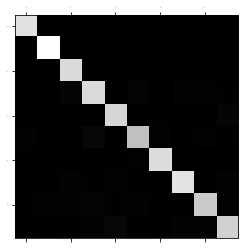

In [330]:
plt.matshow(confusion_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()


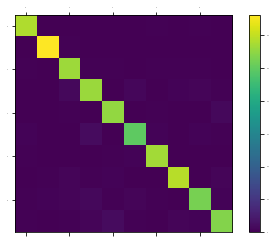

In [332]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
    
plot_confusion_matrix(confusion_mx)    
    

length: 25 5
length: 25 5
Saving figure error_analysis_digits_plot


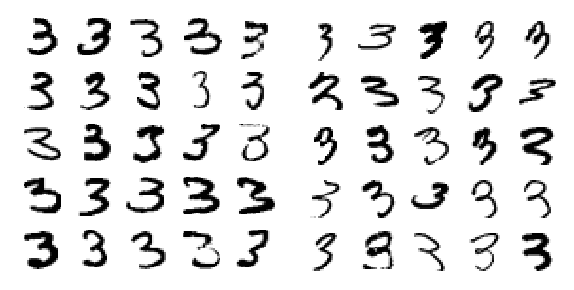

In [357]:
cl_a, cl_b = 3, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

<h3> Multilabel Classification </h3>


In [360]:
from sklearn.neighbors import KNeighborsClassifier

In [368]:
y_train_large = (y_train > 7)
y_train_odd = (y_train % 2 != 0)

y_multilabel = np.c_[y_train_large,y_train_odd]

In [369]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [373]:
knn_clf.predict([some_digit])

array([[ True, False]], dtype=bool)

<b> MultiOutput Classification </b>

In [376]:
noise = np.random.randint(0, 100, (len(X_train), 784))
noise.shape
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

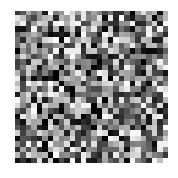

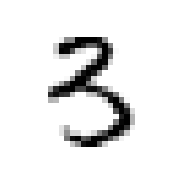

In [382]:
some_index = 5000
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

KNNClassifier

In [389]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [391]:
y_knn_pred = knn_clf.predict(X_test)

In [392]:
y_knn_pred.shape

(10000,)

In [393]:
confusion_matrix(y_knn_pred,y_test)

array([[ 973,    0,   10,    0,    1,    4,    4,    0,    5,    3],
       [   1, 1132,    5,    1,    5,    0,    2,   17,    2,    4],
       [   1,    2,  995,    3,    0,    0,    0,    4,    4,    2],
       [   0,    0,    2,  974,    0,    9,    0,    0,   14,    7],
       [   0,    0,    1,    1,  950,    2,    3,    3,    5,    9],
       [   1,    0,    0,   14,    0,  862,    3,    0,   11,    4],
       [   3,    1,    0,    1,    4,    7,  946,    0,    4,    1],
       [   1,    0,   16,    7,    3,    1,    0,  994,    4,   10],
       [   0,    0,    3,    4,    0,    3,    0,    0,  920,    1],
       [   0,    0,    0,    5,   19,    4,    0,   10,    5,  968]])

In [396]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.97140000000000004

<h3>MNIST Classifier </h3>

In [401]:
from sklearn.model_selection import GridSearchCV

In [406]:
param_grid = [{'weights':["uniform"],'n_neighbors':[3]}]
knn_clf = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(knn_clf, param_grid, cv=2, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

<h3>MLP Classifier</h3>

In [409]:
from sklearn.neural_network import MLPClassifier

In [410]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [411]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32309018
Iteration 2, loss = 0.15565853
Iteration 3, loss = 0.11616499
Iteration 4, loss = 0.09478776
Iteration 5, loss = 0.08105168
Iteration 6, loss = 0.06957423
Iteration 7, loss = 0.06268050
Iteration 8, loss = 0.05560702
Iteration 9, loss = 0.05131174
Iteration 10, loss = 0.04452816


/Users/joby/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.988300
Test set score: 0.969400


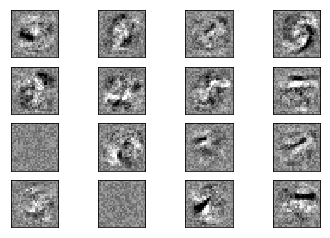

In [415]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()